<a href="https://colab.research.google.com/github/paulandrea0/Qualifica-DAF/blob/main/DAF_e_Clasificador_MLPerseptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [70]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

df_test_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_teste.csv')
df_train_1 = pd.read_csv('/gdrive/MyDrive/Sismos/VT_Z_train.csv') 
df_test_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_teste.csv')
df_train_2 = pd.read_csv('/gdrive/MyDrive/Sismos/LP_Z_train.csv')
df_test_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_teste.csv')
df_train_3 = pd.read_csv('/gdrive/MyDrive/Sismos/TOR_Z_train.csv')

(1480, 13348)
(256, 10993)
(362, 3000)
(40, 3000)
(61, 21494)
(6, 27408)


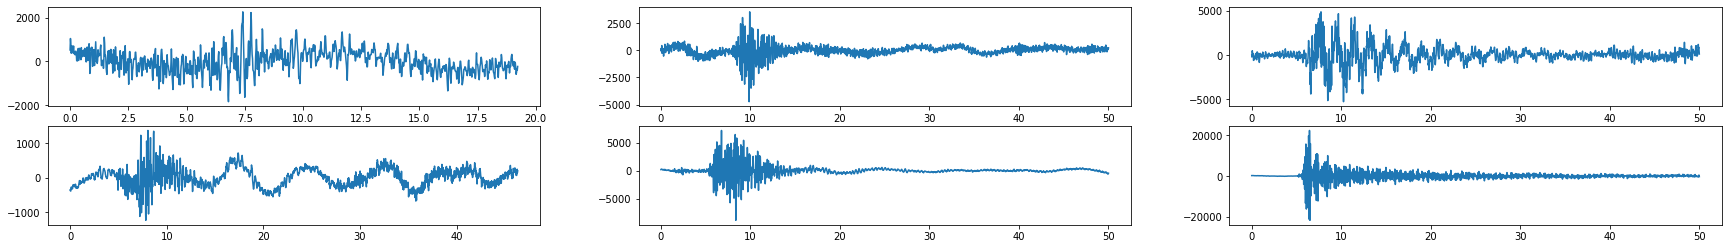

In [3]:
# Creando función para retirar el offset de los datos en DataFrame
def mean_norma(df_input):
        return df_input.apply(lambda x: (x-x.mean()), axis=1)  

df_mean_test_1 = mean_norma(df_test_1)  # Señales VT
df_mean_train_1 = mean_norma(df_train_1)
df_mean_test_2 = mean_norma(df_test_2)  # Señales LP
df_mean_train_2 = mean_norma(df_train_2)
df_mean_test_3 = mean_norma(df_test_3)  # Señales Tor
df_mean_train_3 = mean_norma(df_train_3)

print(df_mean_train_1.shape)
print(df_mean_test_1.shape)
print(df_mean_train_2.shape)
print(df_mean_test_2.shape)
print(df_mean_train_3.shape)
print(df_mean_test_3.shape)

# Convirtiendo el dataframe en array
d_train_1 = df_mean_train_1.values
d_train_1 = d_train_1[:, 0:3000]
d_test_1 = df_mean_test_1.values
d_test_1 = d_test_1[:, 0:3000]

d_train_2 = df_mean_train_2.values
d_train_2 = d_train_2[:, 0:3000]
d_test_2 = df_mean_test_2.values
d_test_2 = d_test_2[:, 0:6000]

d_train_3 = df_mean_train_3.values
d_train_3 = d_train_3[:, 0:3000]
d_test_3 = df_mean_test_3.values
d_test_3 = d_test_3[:, 0:3000]

# Dibujando la señal orioginal
n = 3000
fs = 50 # frecuencia de muestreo
t = np.linspace(0,fs,n)
plt.figure(1, figsize=(30, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

(1480, 3000)
(256, 3000)
(362, 3000)
(40, 3000)
(61, 3000)
(6, 3000)


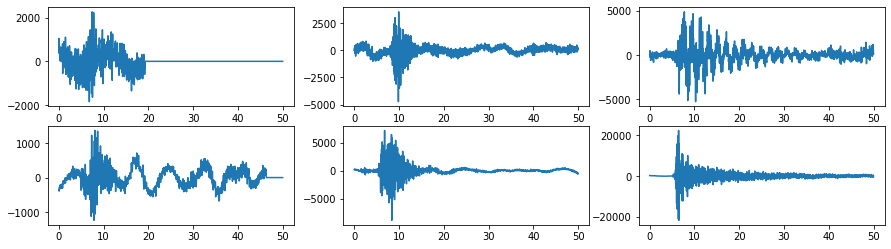

In [4]:
# Quitando los valores NaN de los array numpy

# Señales VT
d_train_1[np.isnan(d_train_1)] = 0.0
d_test_1[np.isnan(d_test_1)] = 0.0
print(d_train_1.shape)
print(d_test_1.shape)

# Señales LP
d_train_2[np.isnan(d_train_2)] = 0.0
d_test_2[np.isnan(d_test_2)] = 0.0
print(d_train_2.shape)
print(d_test_2.shape)

# Señales Tor`
d_train_3[np.isnan(d_train_3)] = 0.0
d_test_3[np.isnan(d_test_3)] = 0.0
print(d_train_3.shape)
print(d_test_3.shape)

# Graficando
plt.figure(2, figsize=(15, 4))
plt.subplot(231)
plt.plot(t, d_train_1[60])
plt.subplot(232)
plt.plot(t, d_train_2[18])
plt.subplot(233) 
plt.plot(t, d_train_3[38])
plt.subplot(234)
plt.plot(t, d_test_1[44])
plt.subplot(235)
plt.plot(t, d_test_2[34])
plt.subplot(236)
plt.plot(t, d_test_3[4])

# Normalización

Mínimo y máximo originales: -2710525.5, 2436521.9
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -151379.3, 151082.0
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: -35374.3, 38363.7
Mínimo y máximo normalizado: 0.0, 1.0


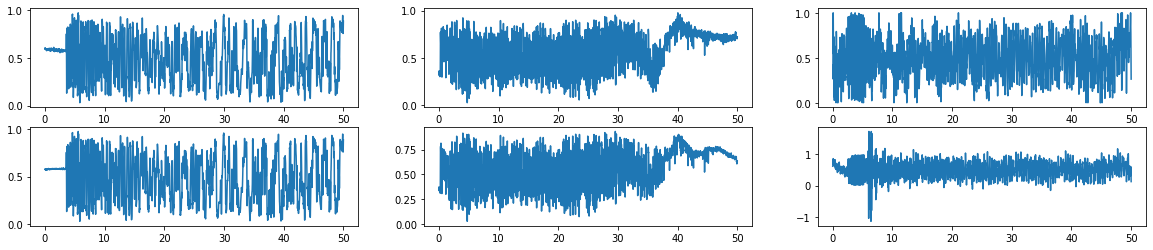

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
D_train_s1 = min_max_scaler.fit_transform(d_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_1), np.max(d_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s1), np.max(D_train_s1))) 
D_test_s1 = min_max_scaler.transform(d_test_1)  

# Señales LP
D_train_s2 = min_max_scaler.fit_transform(d_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_2), np.max(d_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
D_test_s2 = min_max_scaler.transform(d_test_2)  

# Señales Tor
D_train_s3 = min_max_scaler.fit_transform(d_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(d_train_3), np.max(d_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
D_test_s3 = min_max_scaler.transform(d_test_3)  

# Graficando
plt.figure(3, figsize=(20, 4))
plt.subplot(231)
plt.plot(t, D_train_s1[60])
plt.subplot(232)
plt.plot(t, D_train_s2[18])
plt.subplot(233) 
plt.plot(t, D_train_s3[38])
plt.subplot(234)
plt.plot(t, D_test_s1[44])
plt.subplot(235)
plt.plot(t, D_test_s2[34])
plt.subplot(236)
plt.plot(t, D_test_s3[4])

# **D A F** 

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
print('version de TensorFlow:' + tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
version de TensorFlow:2.8.2


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

# **DAF señales VT**

**Autoencoder I sigmoide**

In [8]:
np.random.seed(23)

dim_entrada = D_train_s1.shape[1]      
entrada_sig = Input(shape=(dim_entrada,))
print(D_train_s1.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(entrada_sig)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
encoded_sig = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu')(encoded_sig)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu')(x)
x = Dropout(0.25)(x)
decoded_sig = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)

autoencoder1_sig.summary()

3000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              6002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_2 (Dense)             (None, 1000)              8

**Autoencoder I tanh**

In [9]:
np.random.seed(23)

dim_entrada = D_train_s1.shape[1]      
entrada_tan = Input(shape=(dim_entrada,))
print(D_train_s1.shape[1])             

# Encoder
x = Dense(2000, activation='relu', kernel_regularizer=l2(0.005))(entrada_tan)
x = Dropout(0.25)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
encoded_tan = Dense(800, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(1000, activation='relu')(encoded_tan)
x = Dropout(0.25)(x)
x = Dense(2000, activation='relu')(x)
x = Dropout(0.25)(x)
decoded_tan = Dense(3000, activation='sigmoid')(x)

# autoencoder = entrada + decoder (que contiene el encoder)
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)

autoencoder1_tan.summary()

3000
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3000)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_4 (Dropout)         (None, 2000)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 bottleneck_layer (Dense)    (None, 800)               800800    
                                                                 
 dense_7 (Dense)             (None, 1000)             

In [10]:
autoencoder1_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder1_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_tan.fit(D_train_s1, D_train_s1,    
                           epochs=10,
                           batch_size=150,
                           validation_data=(D_test_s1, D_test_s1),    
                           shuffle=True)

Epoch 1/10
10/10 [==============================] - 4s 39ms/step - loss: 8.3650 - accuracy: 0.0000e+00 - val_loss: 4.6440 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 2.9320 - accuracy: 0.0311 - val_loss: 1.3714 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.7954 - accuracy: 0.3743 - val_loss: 0.3493 - val_accuracy: 0.9727
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 0.1924 - accuracy: 0.6682 - val_loss: 0.0927 - val_accuracy: 0.9727
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0809 - accuracy: 0.7831 - val_loss: 0.0859 - val_accuracy: 0.9727
Epoch 6/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0554 - accuracy: 0.8730 - val_loss: 0.0571 - val_accuracy: 0.9727
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.9365 - val_loss: 0.0455 - val_accuracy: 0.9727
E

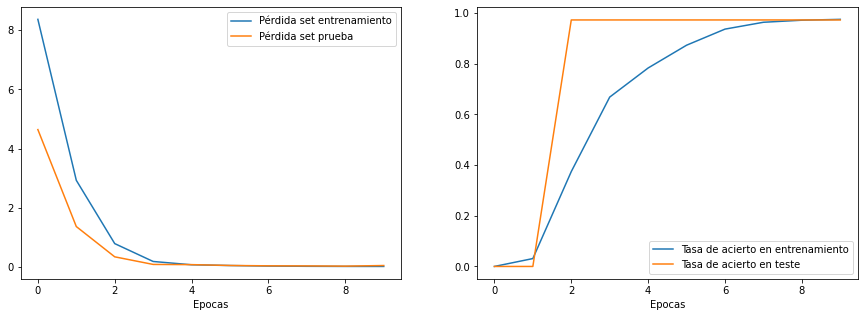

In [11]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [12]:
autoencoder1_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder1_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_sig.fit(D_train_s1, D_train_s1,    
                           epochs=10,
                           batch_size=150,
                           validation_data=(D_test_s1, D_test_s1),    
                           shuffle=True)

Epoch 1/10
10/10 [==============================] - 1s 37ms/step - loss: 8.3577 - accuracy: 0.0000e+00 - val_loss: 4.6526 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 19ms/step - loss: 2.9277 - accuracy: 0.0027 - val_loss: 1.3863 - val_accuracy: 0.0039
Epoch 3/10
10/10 [==============================] - 0s 15ms/step - loss: 0.8027 - accuracy: 0.1007 - val_loss: 0.3396 - val_accuracy: 0.9727
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 0.1996 - accuracy: 0.4818 - val_loss: 0.1028 - val_accuracy: 0.9727
Epoch 5/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0845 - accuracy: 0.8392 - val_loss: 0.0811 - val_accuracy: 0.9727
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.0573 - accuracy: 0.9574 - val_loss: 0.0654 - val_accuracy: 0.9727
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 0.0396 - accuracy: 0.9716 - val_loss: 0.0461 - val_accuracy: 0.9727
Epoch

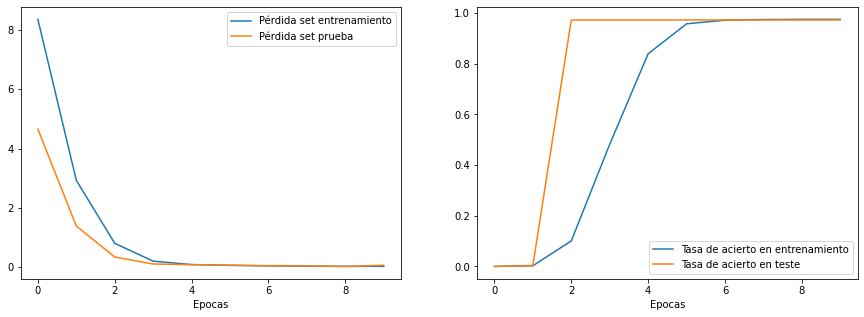

In [13]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [14]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_1sig = bottleneck.predict(D_test_s1)
rep_train_1sig = bottleneck.predict(D_train_s1)
print(rep_test_1sig.shape)
print(rep_train_1sig.shape)

(256, 800)
(1480, 800)


In [15]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_1tan = bottleneck.predict(D_test_s1)
rep_train_1tan = bottleneck.predict(D_train_s1)
print(rep_test_1tan.shape)
print(rep_train_1tan.shape)

(256, 800)
(1480, 800)


**Autoencoder II sigmoid**

In [16]:
np.random.seed(23)

dim_entrada = rep_train_1sig.shape[1]      
entrada_s = Input(shape=(dim_entrada,))
print(rep_train_1sig.shape[1])             

# Encoder
x = Dense(400, activation='relu')(entrada_s)
x = Dropout(0.25)(x)
encoded_s = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu')(encoded_s)
x = Dropout(0.25)(x)
decoded_s = Dense(800, activation='sigmoid')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2sig= Model(inputs=entrada_s, outputs=decoded_s)

autoencoder1_2sig.summary()

800
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_11 (Dense)            (None, 400)               80400     
                                                                 
 dropout_9 (Dropout)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 800)               

In [17]:
autoencoder1_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder1_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2sig.fit(rep_train_1sig, rep_train_1sig,    
                           epochs=10,
                           batch_size=100,
                           validation_data=(rep_test_1sig, rep_test_1sig),    
                           shuffle=True)

Epoch 1/10
15/15 [==============================] - 1s 15ms/step - loss: 0.2785 - accuracy: 0.1162 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.3203 - val_loss: 0.0160 - val_accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 6.7568e-04 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 6.7568e-04 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - accuracy: 6.7568e-04 - val_loss: 0.0122 - val_accuracy: 0.0039
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.0466 - val_loss: 0.0109 - val_accu

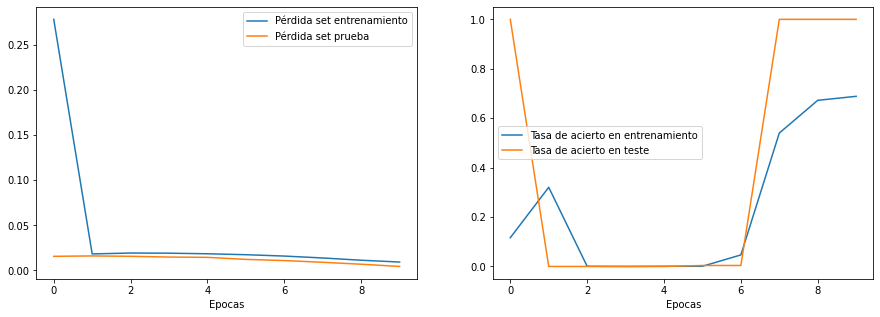

In [18]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [19]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_1s = bottleneck.predict(rep_test_1sig)
rep_train_1s = bottleneck.predict(rep_train_1sig)
print(rep_test_1s.shape)
print(rep_train_1s.shape)

(256, 200)
(1480, 200)


**Autoencoder II tanh**

In [20]:
np.random.seed(23)

dim_entrada = rep_train_1tan.shape[1]      
entrada_t = Input(shape=(dim_entrada,))
print(rep_train_1tan.shape[1])             

# Encoder
x = Dense(400, activation='relu')(entrada_t)
x = Dropout(0.25)(x)
encoded_t = Dense(200, activation='relu', name='bottleneck_layer')(x)

# Decoder 
x = Dense(400, activation='relu')(encoded_t)
x = Dropout(0.25)(x)
decoded_t = Dense(800, activation='tanh')(x)

# autoencod1.2 = Model(inputs=entrada, outputs=decoded)
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)

autoencoder1_2tan.summary()

800
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 800)]             0         
                                                                 
 dense_13 (Dense)            (None, 400)               320400    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 bottleneck_layer (Dense)    (None, 200)               80200     
                                                                 
 dense_14 (Dense)            (None, 400)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 800)               

In [21]:
autoencoder1_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder1_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder1_2tan.fit(rep_train_1tan, rep_train_1tan,    
                           epochs=25,
                           batch_size=100,
                           validation_data=(rep_test_1tan, rep_test_1tan),    
                           shuffle=True)

Epoch 1/25
15/15 [==============================] - 1s 14ms/step - loss: 0.0498 - accuracy: 0.0061 - val_loss: 0.0406 - val_accuracy: 0.0000e+00
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 0.0396 - accuracy: 0.0000e+00 - val_loss: 0.0383 - val_accuracy: 0.0000e+00
Epoch 3/25
15/15 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.0000e+00 - val_loss: 0.0364 - val_accuracy: 0.0000e+00
Epoch 4/25
15/15 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 5/25
15/15 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.0000e+00 - val_loss: 0.0332 - val_accuracy: 0.0000e+00
Epoch 6/25
15/15 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 7/25
15/15 [==============================] - 0s 6ms/step - loss: 0.0311 - accuracy: 0.0000e+00 - val_loss: 0

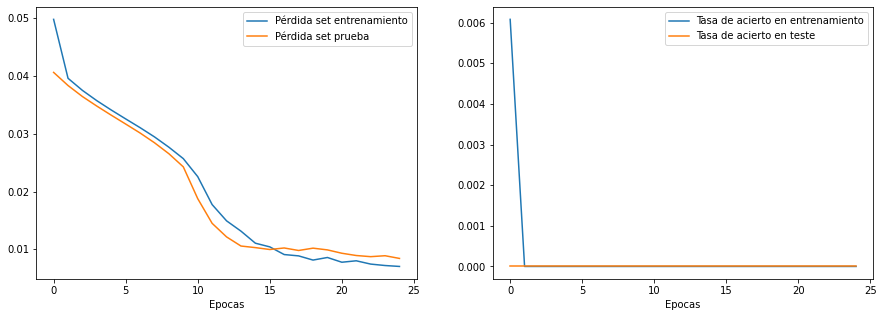

In [22]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [23]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_1t = bottleneck.predict(rep_test_1tan)
rep_train_1t = bottleneck.predict(rep_train_1tan)
print(rep_test_1t.shape)
print(rep_train_1t.shape)

(256, 200)
(1480, 200)


**Representación DAF VT**

In [24]:
rep_train_1 = np.concatenate([rep_train_1s,rep_train_1t], axis=1) 
rep_test_1 = np.concatenate([rep_test_1s,rep_test_1t], axis=1) 
print(rep_test_1.shape)
print(rep_train_1.shape)

(256, 400)
(1480, 400)


# **DAF señales LP**

In [25]:
autoencoder2_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder2_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder2_tan.fit(D_train_s2, D_train_s2,    
                           epochs=20,
                           batch_size=100,
                           validation_data=(D_test_s2, D_test_s2),    
                           shuffle=True)

Epoch 1/20
4/4 [==============================] - 1s 67ms/step - loss: 0.2198 - accuracy: 0.0028 - val_loss: 0.2226 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 0.2145 - accuracy: 0.0028 - val_loss: 0.1918 - val_accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 0s 19ms/step - loss: 0.1683 - accuracy: 0.0000e+00 - val_loss: 0.1274 - val_accuracy: 0.0000e+00
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 0.1156 - accuracy: 0.0055 - val_loss: 0.0904 - val_accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 0s 20ms/step - loss: 0.0816 - accuracy: 0.0083 - val_loss: 0.0632 - val_accuracy: 0.0250
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0657 - accuracy: 0.0304 - val_loss: 0.0585 - val_accuracy: 0.0250
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0566 - accuracy: 0.0387 - val_loss: 0.0498 - val_accuracy: 0.0250
Epoch 8

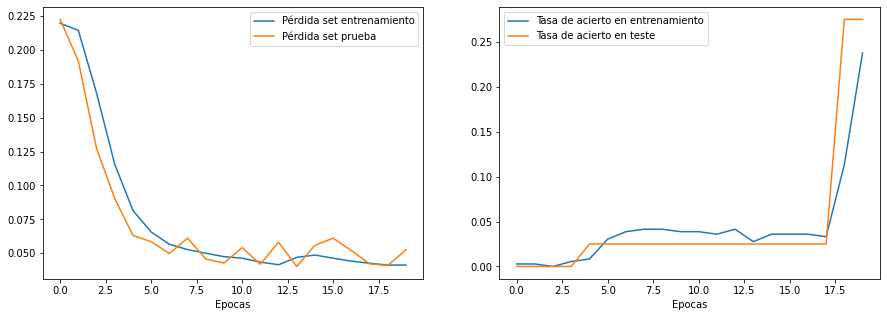

In [26]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [27]:
autoencoder2_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder2_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder2_sig.fit(D_train_s2, D_train_s2,    
                           epochs=20,
                           batch_size=100,
                           validation_data=(D_test_s2, D_test_s2),    
                           shuffle=True)

Epoch 1/20
4/4 [==============================] - 1s 73ms/step - loss: 0.2168 - accuracy: 0.0028 - val_loss: 0.2227 - val_accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 19ms/step - loss: 0.2141 - accuracy: 0.0000e+00 - val_loss: 0.1966 - val_accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 0s 18ms/step - loss: 0.1680 - accuracy: 0.0000e+00 - val_loss: 0.1304 - val_accuracy: 0.0000e+00
Epoch 4/20
4/4 [==============================] - 0s 20ms/step - loss: 0.1171 - accuracy: 0.0000e+00 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.0832 - accuracy: 0.0110 - val_loss: 0.0801 - val_accuracy: 0.0250
Epoch 6/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0709 - accuracy: 0.0414 - val_loss: 0.0595 - val_accuracy: 0.0250
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.0633 - accuracy: 0.0387 - val_loss: 0.0584 - val_accuracy: 0.0250

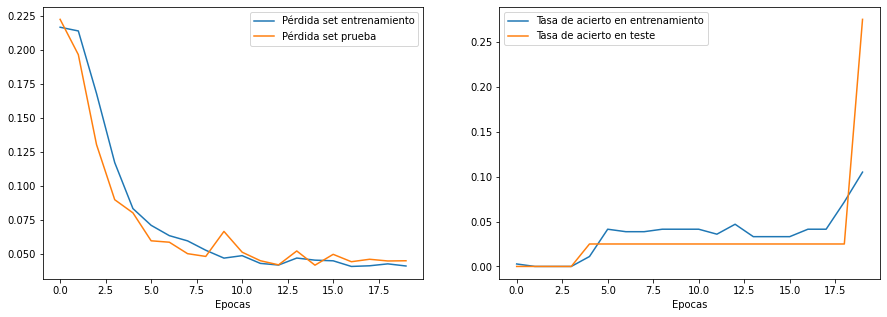

In [28]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [29]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_2sig = bottleneck.predict(D_test_s2)
rep_train_2sig = bottleneck.predict(D_train_s2)
print(rep_test_2sig.shape)
print(rep_train_2sig.shape)

(40, 800)
(362, 800)


In [30]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_2tan = bottleneck.predict(D_test_s2)
rep_train_2tan = bottleneck.predict(D_train_s2)
print(rep_test_2tan.shape)
print(rep_train_2tan.shape)

(40, 800)
(362, 800)


In [31]:
autoencoder2_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder2_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder2_2sig.fit(rep_train_2sig, rep_train_2sig,    
                           epochs=20,
                           batch_size=80,
                           validation_data=(rep_test_2sig, rep_test_2sig),    
                           shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 0.0598 - accuracy: 0.0000e+00 - val_loss: 0.0471 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0459 - accuracy: 0.0000e+00 - val_loss: 0.0448 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0444 - accuracy: 0.0000e+00 - val_loss: 0.0437 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0440 - accuracy: 0.0000e+00 - val_loss: 0.0442 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0441 - accuracy: 0.0000e+00 - val_loss: 0.0441 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0437 - accuracy: 0.0000e+00 - val_loss: 0.0423 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0419 - accuracy: 0.0000e+00 - val_loss: 0.0412 - v

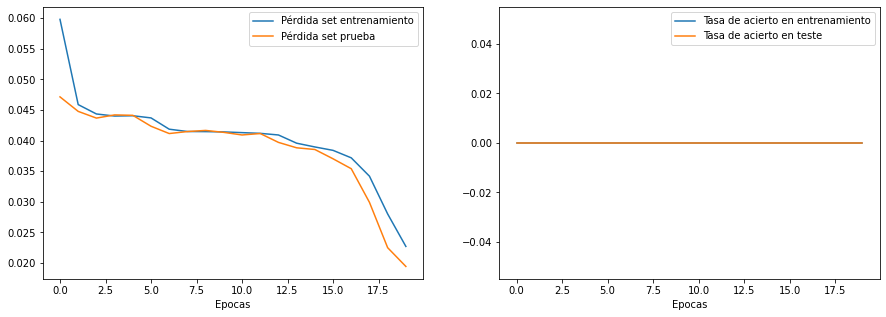

In [32]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [33]:
autoencoder2_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder2_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder2_2tan.fit(rep_train_2tan, rep_train_2tan,    
                           epochs=20,
                           batch_size=80,
                           validation_data=(rep_test_2tan, rep_test_2tan),    
                           shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 0.0725 - accuracy: 0.0000e+00 - val_loss: 0.0684 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0675 - accuracy: 0.0000e+00 - val_loss: 0.0658 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0653 - accuracy: 0.0000e+00 - val_loss: 0.0648 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0642 - accuracy: 0.0000e+00 - val_loss: 0.0639 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0633 - accuracy: 0.0000e+00 - val_loss: 0.0630 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0624 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0615 - accuracy: 0.0000e+00 - val_loss: 0.0613 - v

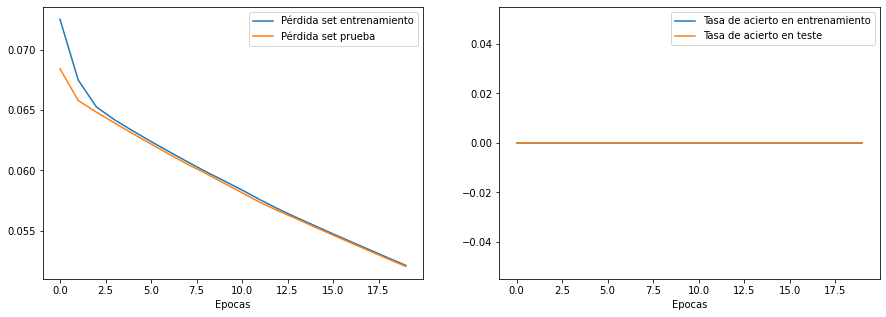

In [34]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [35]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_2s = bottleneck.predict(rep_test_2sig)
rep_train_2s = bottleneck.predict(rep_train_2sig)
print(rep_test_2s.shape)
print(rep_train_2s.shape)

(40, 200)
(362, 200)


In [36]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_2t = bottleneck.predict(rep_test_2tan)
rep_train_2t = bottleneck.predict(rep_train_2tan)
print(rep_test_2t.shape)
print(rep_train_2t.shape)

(40, 200)
(362, 200)


**Representación DAF LP**

In [37]:
rep_train_2 = np.concatenate([rep_train_2s,rep_train_2t], axis=1) 
rep_test_2 = np.concatenate([rep_test_2s,rep_test_2t], axis=1) 
print(rep_test_2.shape)
print(rep_train_2.shape)

(40, 400)
(362, 400)


# **DAF señales Tor**

In [38]:
autoencoder3_tan = Model(inputs=entrada_tan, outputs=decoded_tan)
autoencoder3_tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder3_tan.fit(D_train_s3, D_train_s3,    
                           epochs=20,
                           batch_size=15,
                           validation_data=(D_test_s3, D_test_s3),    
                           shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 62ms/step - loss: 0.2162 - accuracy: 0.0000e+00 - val_loss: 0.2210 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.2044 - accuracy: 0.0164 - val_loss: 0.1978 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1811 - accuracy: 0.0164 - val_loss: 0.1790 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1563 - accuracy: 0.0164 - val_loss: 0.1506 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1375 - accuracy: 0.0164 - val_loss: 0.1386 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1225 - accuracy: 0.0164 - val_loss: 0.1229 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1131 - accuracy: 0.0164 - val_loss: 0.1228 - val_accuracy: 0.0000

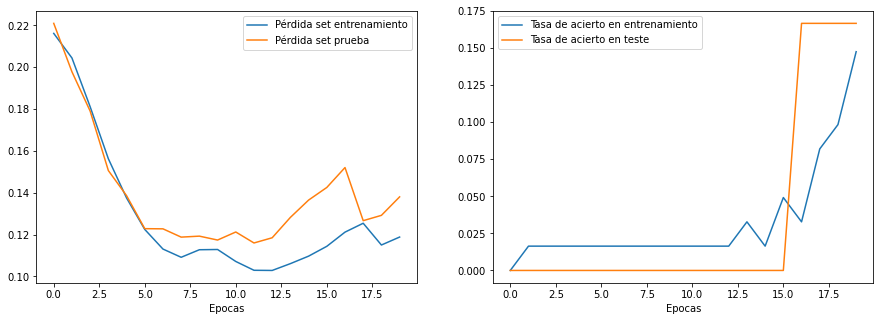

In [39]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [40]:
autoencoder3_sig = Model(inputs=entrada_sig, outputs=decoded_sig)
autoencoder3_sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder3_sig.fit(D_train_s3, D_train_s3,    
                           epochs=20,
                           batch_size=15,
                           validation_data=(D_test_s3, D_test_s3),    
                           shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 46ms/step - loss: 0.2182 - accuracy: 0.0000e+00 - val_loss: 0.2241 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.2080 - accuracy: 0.0000e+00 - val_loss: 0.2007 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.1837 - accuracy: 0.0164 - val_loss: 0.1972 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1696 - accuracy: 0.0164 - val_loss: 0.1613 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1459 - accuracy: 0.0164 - val_loss: 0.1354 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1214 - accuracy: 0.0000e+00 - val_loss: 0.1206 - val_accuracy: 0.0000e+00
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1149 - accuracy: 0.0164 - val_loss: 0.1265 - val_accuracy

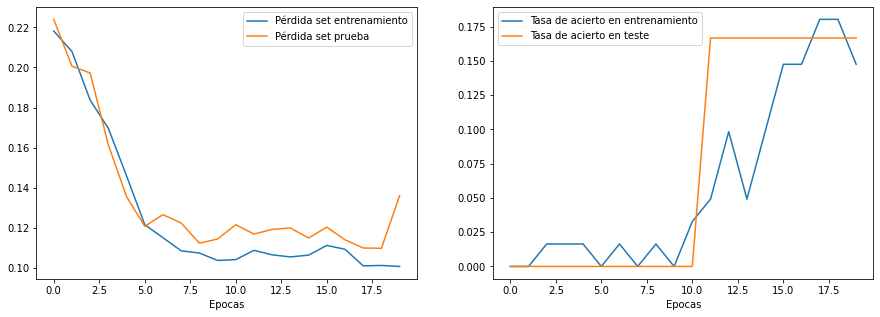

In [41]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [42]:
bottleneck = Model(entrada_sig, encoded_sig)
rep_test_3sig = bottleneck.predict(D_test_s3)
rep_train_3sig = bottleneck.predict(D_train_s3)
print(rep_test_3sig.shape)
print(rep_train_3sig.shape)

(6, 800)
(61, 800)


In [43]:
bottleneck = Model(entrada_tan, encoded_tan)
rep_test_3tan = bottleneck.predict(D_test_s3)
rep_train_3tan = bottleneck.predict(D_train_s3)
print(rep_test_3tan.shape)
print(rep_train_3tan.shape)

(6, 800)
(61, 800)


In [44]:
autoencoder3_2sig = Model(inputs=entrada_s, outputs=decoded_s)
autoencoder3_2sig.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder3_2sig.fit(rep_train_3sig, rep_train_3sig,    
                           epochs=15,
                           batch_size=10,
                           validation_data=(rep_test_3sig, rep_test_3sig),    
                           shuffle=True)

Epoch 1/15
7/7 [==============================] - 1s 25ms/step - loss: 0.1239 - accuracy: 0.0000e+00 - val_loss: 0.1166 - val_accuracy: 0.0000e+00
Epoch 2/15
7/7 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.0000e+00 - val_loss: 0.1120 - val_accuracy: 0.0000e+00
Epoch 3/15
7/7 [==============================] - 0s 6ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - val_loss: 0.1119 - val_accuracy: 0.0000e+00
Epoch 4/15
7/7 [==============================] - 0s 7ms/step - loss: 0.1110 - accuracy: 0.0000e+00 - val_loss: 0.1119 - val_accuracy: 0.0000e+00
Epoch 5/15
7/7 [==============================] - 0s 6ms/step - loss: 0.1110 - accuracy: 0.0000e+00 - val_loss: 0.1119 - val_accuracy: 0.0000e+00
Epoch 6/15
7/7 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.0000e+00 - val_loss: 0.1107 - val_accuracy: 0.0000e+00
Epoch 7/15
7/7 [==============================] - 0s 6ms/step - loss: 0.1098 - accuracy: 0.0000e+00 - val_loss: 0.1106 - va

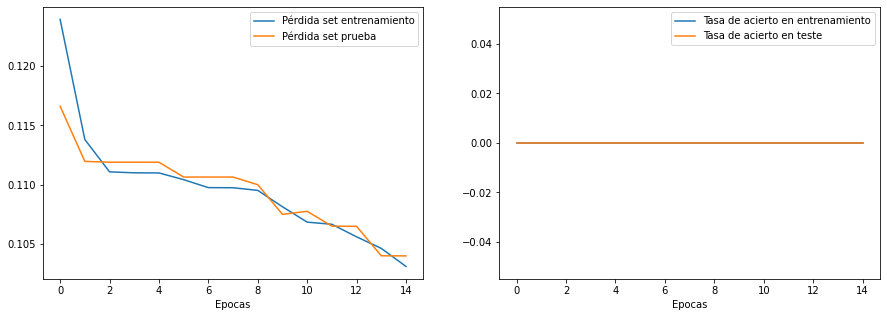

In [45]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [46]:
autoencoder3_2tan = Model(inputs=entrada_t, outputs=decoded_t)
autoencoder3_2tan.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder3_2tan.fit(rep_train_3tan, rep_train_3tan,    
                           epochs=20,
                           batch_size=10,
                           validation_data=(rep_test_3tan, rep_test_3tan),    
                           shuffle=True)

Epoch 1/20
7/7 [==============================] - 1s 26ms/step - loss: 0.0577 - accuracy: 0.0000e+00 - val_loss: 0.0567 - val_accuracy: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.0000e+00 - val_loss: 0.0553 - val_accuracy: 0.0000e+00
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0546 - accuracy: 0.0000e+00 - val_loss: 0.0540 - val_accuracy: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0528 - val_accuracy: 0.0000e+00
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0521 - accuracy: 0.0000e+00 - val_loss: 0.0516 - val_accuracy: 0.0000e+00
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0509 - accuracy: 0.8361 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 

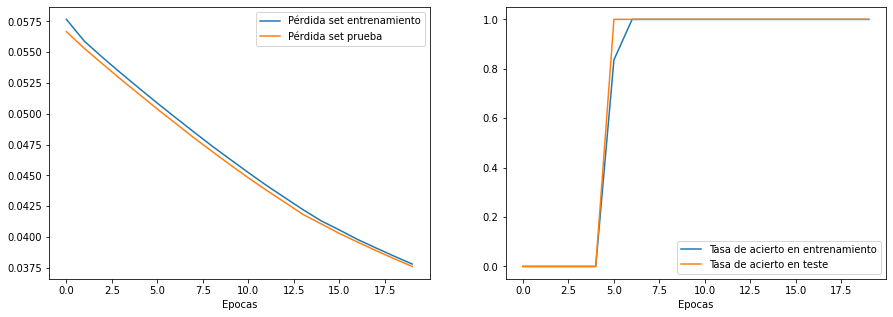

In [47]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

In [48]:
bottleneck = Model(entrada_s, encoded_s)
rep_test_3s = bottleneck.predict(rep_test_3sig)
rep_train_3s = bottleneck.predict(rep_train_3sig)
print(rep_test_3s.shape)
print(rep_train_3s.shape)

(6, 200)
(61, 200)


In [49]:
bottleneck = Model(entrada_t, encoded_t)
rep_test_3t = bottleneck.predict(rep_test_3tan)
rep_train_3t = bottleneck.predict(rep_train_3tan)
print(rep_test_3t.shape)
print(rep_train_3t.shape)

(6, 200)
(61, 200)


**Representación DAF Tor**

In [50]:
rep_train_3 = np.concatenate([rep_train_3s,rep_train_3t], axis=1) 
rep_test_3 = np.concatenate([rep_test_3s,rep_test_3t], axis=1) 
print(rep_test_3.shape)
print(rep_train_3.shape)

(6, 400)
(61, 400)


# Representaciones de menor Dimensión

Una vez entrenado el autoencoder extraemos la información aprendida de la capa de menor dimensión, la cual consigue representar mejor la señal.

A continuación se presenta una representación por cada tipo de señal solo para poder identificar las diferntes representaciones obtenidas.

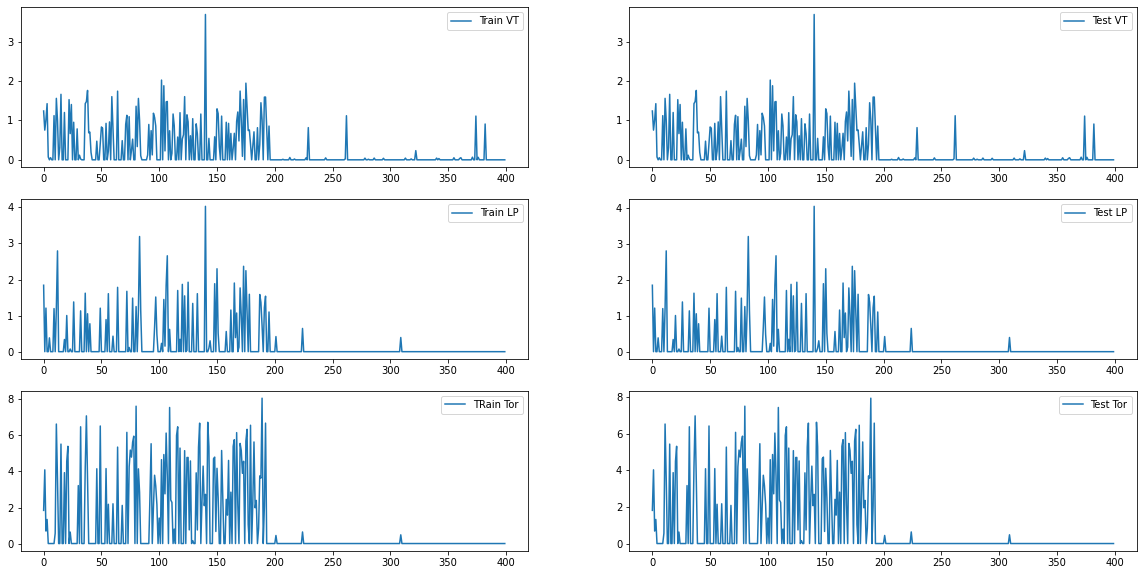

In [52]:
# Observamos cómo el Autoencoder consigue representar 

dato = 1    # Elegimos un dato al azar de los registro de los data sets de validación
# El data set con el menor número de datos de validación es para la señal Tor con 6 ejemplos.

plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(rep_train_1[dato])
plt.legend(labels=["Train VT"])
plt.subplot(3,2,2)
plt.plot(rep_test_1[dato])
plt.legend(labels=["Test VT"])
plt.subplot(3,2,3)
plt.plot(rep_train_2[dato])
plt.legend(labels=["Train LP"])
plt.subplot(3,2,4)
plt.plot(rep_test_2[dato])
plt.legend(labels=["Test LP"])
plt.subplot(3,2,5)
plt.plot(rep_train_3[dato])
plt.legend(labels=["TRain Tor"])
plt.subplot(3,2,6)
plt.plot(rep_test_3[dato])
plt.legend(labels=["Test Tor"])

# **Classificação com MLPerceptron**

Preparando los datos para ser presentados en el clasificador

**Normalización de las representaciones**

Mínimo y máximo originales: 0.0, 3.7
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: 0.0, 4.2
Mínimo y máximo normalizado: 0.0, 1.0
Mínimo y máximo originales: 0.0, 8.3
Mínimo y máximo normalizado: 0.0, 1.0
400


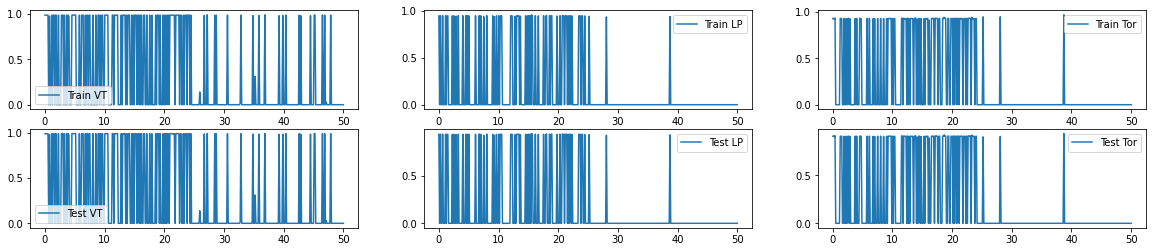

In [53]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Señales VT
Rep_train_s1 = min_max_scaler.fit_transform(rep_train_1)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_1), np.max(rep_train_1)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(Rep_train_s1), np.max(Rep_train_s1))) 
Rep_test_s1 = min_max_scaler.transform(rep_test_1)  

# Señales LP
Rep_train_s2 = min_max_scaler.fit_transform(rep_train_2)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_2), np.max(rep_train_2)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s2), np.max(D_train_s2))) 
Rep_test_s2 = min_max_scaler.transform(rep_test_2)  

# Señales Tor
Rep_train_s3 = min_max_scaler.fit_transform(rep_train_3)
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(rep_train_3), np.max(rep_train_3)))      
print('Mínimo y máximo normalizado: {:.1f}, {:.1f}'.format(np.min(D_train_s3), np.max(D_train_s3))) 
Rep_test_s3 = min_max_scaler.transform(rep_test_3)  

# Graficando
n3 = Rep_train_s1.shape[1]
t3 = np.linspace(0,fs,n3) # creando un vector de tiempo
print(len(t3))
plt.figure(figsize=(20, 4))
plt.subplot(231)
plt.plot(t3, Rep_train_s1[60])
plt.legend(labels=["Train VT"])
plt.subplot(232)
plt.plot(t3, Rep_train_s2[18])
plt.legend(labels=["Train LP"])
plt.subplot(233) 
plt.plot(t3, Rep_train_s3[38])
plt.legend(labels=["Train Tor"])
plt.subplot(234)
plt.plot(t3, Rep_test_s1[44])
plt.legend(labels=["Test VT"])
plt.subplot(235)
plt.plot(t3, Rep_test_s2[34])
plt.legend(labels=["Test LP"])
plt.subplot(236)
plt.plot(t3, Rep_test_s3[4])
plt.legend(labels=["Test Tor"])

In [54]:
# a continuación son adicionadas tres columnas que me permitirán ser usadas de etiquetas para los tipos de sismos
D_train_s1 = np.insert(Rep_train_s1, [0], (1,0,0), axis=1)
D_test_s1 = np.insert(Rep_test_s1, [0], (1,0,0), axis=1)
D_train_s2 = np.insert(Rep_train_s2, [0], (0,1,0), axis=1)
D_test_s2 = np.insert(Rep_test_s2, [0], (0,1,0), axis=1)
D_train_s3 = np.insert(Rep_train_s3, [0], (0,0,1), axis=1)
D_test_s3 = np.insert(Rep_test_s3, [0], (0,0,1), axis=1)

print(D_train_s1[1,0:5], D_test_s1[1,0:25])
print(D_train_s2[1,0:5], D_test_s2[1,0:25])
print(D_train_s3[1,0:5], D_test_s3[1,0:25])
print(D_train_s1[1,0:5], D_test_s1[1,0:25])
print(D_train_s2[1,0:5], D_test_s2[1,0:25])
print(D_train_s3[1,0:5], D_test_s3[1,0:25])

# Creo mi set de entrenamiento con sismos y sus etiquetas correspondientes y lo mismo para mi set de prueba
set_train = np.concatenate([D_train_s1,D_train_s2, D_train_s3], axis=0) 
set_test = np.concatenate([D_test_s1,D_test_s2, D_test_s3], axis=0) 
y_vector = np.concatenate([set_train, set_test])
y_vector = y_vector[:,0:3]
# le doy una mezcla a los datos para que entren en desorden en la red neuronal
np.random.shuffle(set_train)
np.random.shuffle(set_test)

print(set_train.shape, set_test.shape)
print(y_vector)

[1.         0.         0.         0.9858221  0.98568976] [1.         0.         0.         0.98610055 0.98594654 0.9860871
 0.98614454 0.98532796 0.         0.974504   0.         0.
 0.98599994 0.         0.98581696 0.9861429  0.         0.98619854
 0.985891   0.         0.         0.985978   0.         0.
 0.        ]
[0.         1.         0.         0.91818565 0.        ] [0.         1.         0.         0.9271106  0.         0.927944
 0.         0.         0.9300834  0.         0.         0.
 0.9286087  0.         0.92675483 0.9273549  0.         0.
 0.         0.         0.         0.9268543  0.         0.92766154
 0.        ]
[0.         0.         1.         0.91797996 0.9211962 ] [0.         0.         1.         0.8692286  0.87427115 0.86132693
 0.8773644  0.         0.         0.         0.         0.
 0.         0.86982036 0.8717625  0.8684726  0.         0.
 0.86998105 0.         0.         0.8704276  0.         0.86625886
 0.87386084]
[1.         0.         0.         0.9

In [55]:
print(set_train.shape, set_test.shape)
y_train, X_train =  set_train[:,0:3], np.delete(set_train, range(0, 3), axis=1)
y_test, X_test = set_test[:,0:3], np.delete(set_test, range(0, 3), axis=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_train[1,0:5], X_train[1,0:5])
print(y_test[1,0:5], X_test[1,0:5])

(1903, 403) (302, 403)
(1903, 400) (1903, 3) (302, 400) (302, 3)
[0. 1. 0.] [0.9279185 0.        0.9287947 0.        0.       ]
[0. 1. 0.] [0.9199074 0.        0.9210891 0.        0.       ]


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential
from keras.regularizers import l2 # cuando hay sobreajuste la regularización ayuda
# a decartar valores altos en la función de costo. Se puede colocar en cualquier capa
from keras.layers import Dropout  #apagar aleatoriamente algunas neuronas, 
# ayudando a eliminar el sobreajuste
from keras.callbacks import EarlyStopping

In [57]:
np.random.seed(23)

dim_entrada = X_train.shape[1]      
entrada = Input(shape=(dim_entrada,))
print(X_train.shape[1])      

x = Dense(500, activation='relu', kernel_regularizer=l2(0.005))(entrada)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
saida = Dense(3, activation='softmax')(x)

clasificador = Model(inputs=entrada, outputs=saida)
clasificador.summary()

400
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 400)]             0         
                                                                 
 dense_16 (Dense)            (None, 500)               200500    
                                                                 
 dropout_12 (Dropout)        (None, 500)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               50100     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 3)                 303       
                                                                 
Total params: 250,903
Trainable params: 250,903
Non-tr

In [58]:
clasificador = Model(inputs=entrada, outputs=saida)
clasificador.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = clasificador.fit(X_train, y_train,    
                           epochs=15,
                           batch_size=250,
                           validation_data=(X_test, y_test),    
                           shuffle=True)

Epoch 1/15
8/8 [==============================] - 1s 24ms/step - loss: 2.1556 - accuracy: 0.7966 - val_loss: 1.7512 - val_accuracy: 0.9801
Epoch 2/15
8/8 [==============================] - 0s 6ms/step - loss: 1.5798 - accuracy: 0.9690 - val_loss: 1.3295 - val_accuracy: 0.9801
Epoch 3/15
8/8 [==============================] - 0s 6ms/step - loss: 1.1857 - accuracy: 0.9937 - val_loss: 0.9937 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 0s 6ms/step - loss: 0.8830 - accuracy: 0.9995 - val_loss: 0.7375 - val_accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.9995 - val_loss: 0.5437 - val_accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 0s 7ms/step - loss: 0.4812 - accuracy: 0.9995 - val_loss: 0.3999 - val_accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 0s 6ms/step - loss: 0.3543 - accuracy: 0.9995 - val_loss: 0.2948 - val_accuracy: 1.0000
Epoch 8/15
8/8 [=================

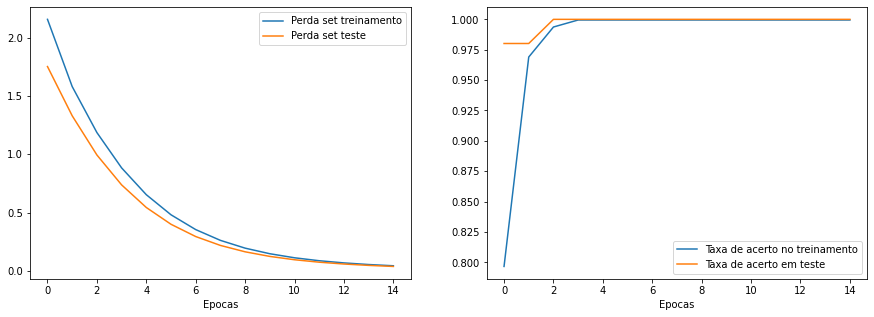

In [89]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Perda set treinamento")
plt.plot(historia.history["val_loss"], label="Perda set teste")
plt.xlabel('Epocas')
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Taxa de acerto no treinamento")
plt.plot(historia.history["val_accuracy"], label="Taxa de acerto em teste")
plt.xlabel('Epocas')
plt.legend()

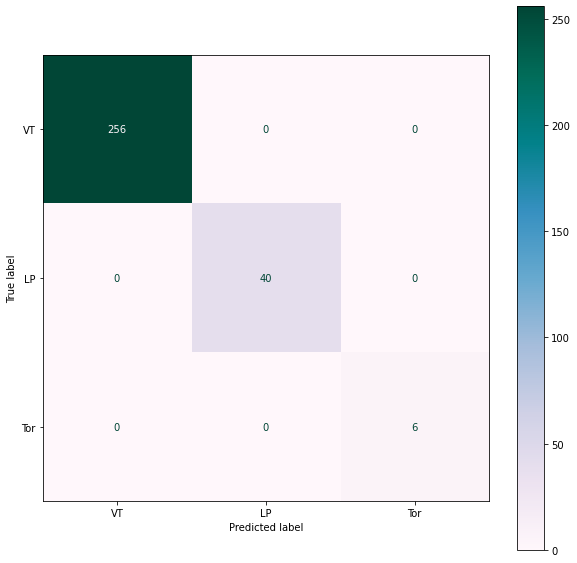

[[256   0   0]
 [  0  40   0]
 [  0   0   6]]
[[[ 46   0]
  [  0 256]]

 [[262   0]
  [  0  40]]

 [[296   0]
  [  0   6]]]


In [86]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

clasificador = Model(inputs=entrada, outputs=saida)
y_pred = clasificador.predict(X_test)

y_pred_ = np.rint(y_pred)

y_true = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_true.append('VT')
  if y_test[i,1] > 0:
    y_true.append('LP')
  if y_test[i,2] > 0:
    y_true.append('Tor')

y_salida = []
for i in range(len(y_pred_)):
  if y_pred_[i,0] > 0:
    y_salida.append('VT')
  if y_pred_[i,1] > 0:
    y_salida.append('LP')
  if y_pred_[i,2] > 0:
    y_salida.append('Tor')

# Matriz de confusión multiclase
c = confusion_matrix ( y_true , y_salida , labels = ["VT", "LP", "Tor"] , sample_weight = None )
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["VT", "LP", "Tor"])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'PuBuGn', colorbar = True)
plt.show()

print(c)
cm = multilabel_confusion_matrix(y_true, y_salida, labels=["VT", "LP", "Tor"])
print(cm)

cmVT = cm[0]
cmLP = cm[1]
cmTor = cm[2]

In [61]:
def calcular_sensitividad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FN = CM[0,1]
  sen = 100*(TP/(TP+FN))
  print('Sensitividad ' + clase_sismo + ': {:.1f}%'.format(sen))
  return sen


def calcular_especificidad(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TN = CM[0,0]
  FP = CM[1,0]
  esp = 100*(TN/(TN+FP))
  print('Especificidad ' + clase_sismo + ': {:.1f}%'.format(esp))
  return esp


def calcular_precision(clase_sismo):
  if clase_sismo =='VT':
    CM = cmVT
  if clase_sismo =='LP':
    CM = cmLP
  if clase_sismo =='Tor':
    CM = cmTor
  TP = CM[1,1]
  FP = CM[1,0]
  pres = 100*(TP/(TP+FP))
  print('Precisión ' + clase_sismo + ': {:.1f}%'.format(pres))
  return pres  


def calcular_f1(sencitividad, precision, clase_sismo):
  f1 = 2*(precision*sencitividad)/(precision+sencitividad)
  print('f1 score ' + clase_sismo + ': {:.1f}%'.format(f1))
  return f1  

In [62]:
# Calculo de Especificidad
esp_1 = calcular_especificidad('VT')
esp_2 = calcular_especificidad('LP')
esp_3 = calcular_especificidad('Tor')

# Cálculo de Sensitividad
sen_1 = calcular_sensitividad('VT')
sen_2 = calcular_sensitividad('LP')
sen_3 = calcular_sensitividad('Tor')

# Cálculo de Precisión
pres_1 = calcular_precision('VT')
pres_2 = calcular_precision('LP')
pres_3 = calcular_precision('Tor')

# Cálculo de f1 score
f1_1 = calcular_f1(sen_1,pres_1,'VT')
f1_2 = calcular_f1(sen_2,pres_2,'LP')
f1_3 = calcular_f1(sen_3,pres_3,'Tor')

Especificidad VT: 100.0%
Especificidad LP: 100.0%
Especificidad Tor: 100.0%
Sensitividad VT: 100.0%
Sensitividad LP: 100.0%
Sensitividad Tor: 100.0%
Precisión VT: 100.0%
Precisión LP: 100.0%
Precisión Tor: 100.0%
f1 score VT: 100.0%
f1 score LP: 100.0%
f1 score Tor: 100.0%


In [64]:
from sklearn.metrics import classification_report
# y_pred_label, y_test_label
target_names = ['VT', 'LP', 'Tor']
print(classification_report(y_true, y_salida, target_names=target_names))

              precision    recall  f1-score   support

          VT       1.00      1.00      1.00        40
          LP       1.00      1.00      1.00         6
         Tor       1.00      1.00      1.00       256

    accuracy                           1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



In [65]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 3

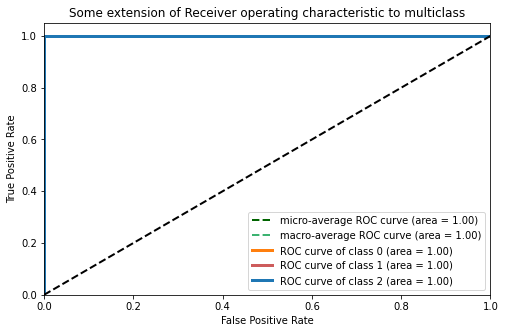

In [80]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="darkgreen", #deeppink
    linestyle="--",
    linewidth=2,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="mediumseagreen", #
    linestyle="--",
    linewidth=2,
)

colors = cycle(["tab:orange", "indianred", "tab:blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

''' 
Definiendo funciones
'''

def calculate_tpr_fpr(y_test_label, y_pred_label):
  cm = confusion_matrix(y_test_label, y_pred_label)
  TN = cm[0, 0]
  FP = cm[0, 1]
  FN = cm[1, 0]
  TP = cm[1, 1]

  # Calcula tpr y fpr
  tpr =  TP/(TP + FN) # sensitivity - true positive rate
  fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

  return tpr, fpr



def get_all_roc_coordinates(etiquetas, y_probab):
    
    # Calcula todas las coordenadas de la curva ROC (tpr y fpr) considerando cada punto como un umbral para la predicción de la clase.
    
    # Args:
        # y_test_label: La lista o serie con las etiquetas de las clases reales.
        # y_probabilidades: El arreglo con las probabilidades para cada clase, obtenido usando el método `clasificador.predict(X_test)`.
        
    # Returns:
        # tpr_list: la lista de TPR que representan cada umbral.
        # fpr_list: la lista de FPR que representa cada umbral.
    
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_probab)):
        threshold = y_probab[i]
        y_predict = y_probab >= threshold
        tpr, fpr = calculate_tpr_fpr(etiquetas, y_predict)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
    # grafica la curva ROC utilizando la lista de coordenadas (tpr y fpr).
    
    # Args:
        # tpr: La lista de TPR que representan cada coordenada.
        # fpr: La lista de FPR que representan cada coordenada.
        # scatter: Cuando es Verdadero, los puntos utilizados en el cálculo se trazarán con la línea (predeterminado = Verdadero).
    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
print(set_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
from numpy.ma.core import concatenate
y_array = []
for i in range(len(y_train)):
  if y_vector[i,0] > 0:
    y_array.append('VT')
  if y_vector[i,1] > 0:
    y_array.append('LP')
  if y_vector[i,2] > 0:
    y_array.append('Tor')
i = i + 1
df = pd.DataFrame({'class': y_array})


y_clas = []
for i in range(len(y_test)):
  if y_test[i,0] > 0:
    y_clas.append('VT')
  if y_test[i,1] > 0:
    y_clas.append('LP')
  if y_test[i,2] > 0:
    y_clas.append('Tor')

i = i + 1
df_class = pd.DataFrame({'class': y_clas})

y = df['class']
y_class = df_class['class']

X_test = pd.DataFrame(X_test)

print(y_class)
print(y)
print(X_test)

0      VT
1      LP
2      VT
3      VT
4      VT
       ..
297    VT
298    LP
299    VT
300    VT
301    VT
Name: class, Length: 302, dtype: object
0        VT
1        VT
2        VT
3        VT
4        VT
       ... 
1898    Tor
1899    Tor
1900    Tor
1901    Tor
1902    Tor
Name: class, Length: 1903, dtype: object
          0         1    2         3         4         5         6    7    \
0    0.986918  0.986872  0.0  0.986898  0.986544  0.986497  0.986813  0.0   
1    0.920688  0.000000  0.0  0.917511  0.915564  0.000000  0.000000  0.0   
2    0.986618  0.986567  0.0  0.986598  0.986250  0.986188  0.986507  0.0   
3    0.987703  0.987661  0.0  0.987684  0.987332  0.987307  0.987611  0.0   
4    0.987080  0.987025  0.0  0.987059  0.986716  0.986650  0.986983  0.0   
..        ...       ...  ...       ...       ...       ...       ...  ...   
297  0.984398  0.984306  0.0  0.984364  0.984020  0.983873  0.984232  0.0   
298  0.928460  0.000000  0.0  0.925533  0.924029  0.000000  0

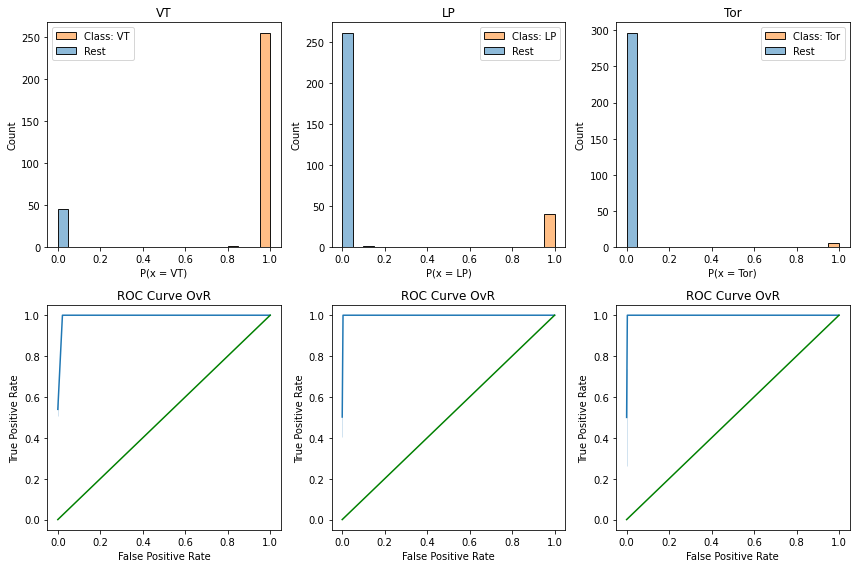

In [ ]:
#classes = model_multiclass.classes_
classes = np.array(['VT', 'LP', 'Tor'], dtype=object)
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_class]
    df_aux['prob'] = y_pred[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [87]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_pred, labels = classes, multi_class = 'ovr', average = 'macro')

NameError: ignored